2 Datasets--
1. Athlete(2.7 Lakhs+ datapoints)

2. NOC

WorkFlow
1. import the libraries
2. reading the dataset
3. creating the copy of the dataframe
4. data exploration
5. data analysis

# Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Reading the dataset

In [ ]:
athlete=pd.read_csv("/content/drive/MyDrive/11.04.2024/athlete_events (1).csv")
noc=pd.read_csv("/content/drive/MyDrive/11.04.2024/noc_regions.csv")

In [ ]:
ath = athlete.copy()
nat = noc.copy()

# data exploration

In [ ]:
len(ath)

271116

In [ ]:
ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
nat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [ ]:
ath.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [ ]:
nat.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

# Data Cleaning

1.    Add a new column "region" in ath DataFrame

region column should be created according to the NOC,

region columns in **nat** and NOC column on **ath**

In [ ]:
at=ath.merge(nat,on="NOC")

In [ ]:
at.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [ ]:
at.drop(['NOC','notes'], axis=1, inplace=True)

KeyError: "['NOC', 'notes'] not found in axis"

# Handle null values in the column

1. Age

2. Height
             
3. Weight
by mean

In [ ]:
ath=at
ath['Age'].fillna(ath.Age.mean(), inplace=True)
ath['Height'].fillna(ath.Height.mean(), inplace=True)
ath['Weight'].fillna(ath.Weight.mean(), inplace=True)

In [ ]:
ath[ath.Age.isnull()].head()

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,region


In [ ]:
ath.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     230993
region        21
dtype: int64

In [ ]:
# Medal     230993
# region        21
# null values

List out all the values of the 'region'  column values are null

try to fill


In [ ]:
ath[ath.region.isna()]

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,region
264737,3515,Paulo Amotun Lokoro,M,24.000000,170.00000,61.000000,Refugee Olympic Athletes,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN,NaN
264738,4379,Rami Anis,M,25.000000,178.00000,78.000000,Refugee Olympic Athletes,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,NaN,NaN
264739,4379,Rami Anis,M,25.000000,178.00000,78.000000,Refugee Olympic Athletes,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,NaN,NaN
264740,11364,Yiech Pur Biel,M,21.000000,178.00000,62.000000,Refugee Olympic Athletes,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,NaN,NaN
264741,16287,Mabika Yolande Bukasa,F,28.000000,170.00000,70.000000,Refugee Olympic Athletes,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,NaN,NaN
264742,20693,James Nyang Chiengjiek,M,24.000000,179.00000,59.000000,Refugee Olympic Athletes,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,NaN,NaN
264743,60444,Yonas Kinde,M,36.000000,172.00000,57.000000,Refugee Olympic Athletes,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,NaN,NaN
264744,71067,Anjelina Nadai Lohalith,F,23.000000,163.00000,50.000000,Refugee Olympic Athletes,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 1,500 metres",NaN,NaN
264745,71113,Rose Nathike Lokonyen,F,21.000000,157.00000,50.000000,Refugee Olympic Athletes,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 800 metres,NaN,NaN
264746,74902,Yusra Mardini,F,18.000000,157.00000,53.000000,Refugee Olympic Athletes,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 100 metres Freestyle,NaN,NaN


In [ ]:
#Trying to fill the regions
# Team name:Tuvalu--try to match and see region

In [ ]:
nat.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
nat[nat.region=="Tuvalu"]# nope, no match

,NOC,region,notes


In [ ]:
#  new_region=[]
# for i in ath.NOC[:10]:
#   a=nat[nat.NOC==i]['region']
#   print(a.values[0])



In [ ]:
# nat[nat.NOC=='AFG']['region']

0    Afghanistan
Name: region, dtype: object

 Handle null valuse in medal column

In [ ]:
# see categories

In [ ]:
ath.Medal.unique()

array([nan, 'Silver', 'Bronze', 'Gold'], dtype=object)

In [ ]:
# see strength in each category

ath.Medal.value_counts()

Medal
Gold      13371
Bronze    13291
Silver    13112
Name: count, dtype: int64

In [ ]:
# # Replace
# NaN with 0
# Gold with 1
# Silver with 2
# Bronze with 3

In [ ]:
ath.Medal.fillna(0, inplace=True)

In [ ]:
ath.Medal.replace({'Gold': 1, 'Silver': 2, 'Bronze':3}, inplace=True)

In [ ]:
ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,China
2,602,Abudoureheman,M,22.0,182.0,75.0,China,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,0,China
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",0,China
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,0,China


In [ ]:
# check
ath.Medal.unique()

array([0, 2, 3, 1])

In [ ]:
ath.Medal.value_counts()

Medal
0    230993
1     13371
3     13291
2     13112
Name: count, dtype: int64

In [ ]:
ath.Medal.info()

<class 'pandas.core.series.Series'>
RangeIndex: 270767 entries, 0 to 270766
Series name: Medal
Non-Null Count   Dtype
--------------   -----
270767 non-null  int64
dtypes: int64(1)
memory usage: 2.1 MB


In [ ]:
#-----------------------------at this stage---------------------

region coulmn

In [ ]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270767 entries, 0 to 270766
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      270767 non-null  int64  
 1   Name    270767 non-null  object 
 2   Sex     270767 non-null  object 
 3   Age     270767 non-null  float64
 4   Height  270767 non-null  float64
 5   Weight  270767 non-null  float64
 6   Team    270767 non-null  object 
 7   Games   270767 non-null  object 
 8   Year    270767 non-null  int64  
 9   Season  270767 non-null  object 
 10  City    270767 non-null  object 
 11  Sport   270767 non-null  object 
 12  Event   270767 non-null  object 
 13  Medal   270767 non-null  int64  
 14  region  270746 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 31.0+ MB


In [ ]:
ath.isnull().sum()

ID         0
Name       0
Sex        0
Age        0
Height     0
Weight     0
Team       0
Games      0
Year       0
Season     0
City       0
Sport      0
Event      0
Medal      0
region    21
dtype: int64

In [ ]:
# region    21 null values

In [ ]:
ath[['Team','region']]

,Team,region
0,China,China
1,China,China
2,China,China
3,China,China
4,China,China
...,...,...
270762,Lesotho,Lesotho
270763,Lesotho,Lesotho
270764,Lesotho,Lesotho
270765,Lesotho,Lesotho


In [ ]:
#Almost region column and the Team column are same, so lets drop the "region" column

drop off unwanted columns

In [ ]:
# 1. region
# 2. Games
ath.drop(['region','Games'], axis=1, inplace=True)

In [ ]:
ath.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0


remove the unwanted phrases from the 'Event' column

In [ ]:
# re

In [ ]:
ath.Event

0                      Basketball Men's Basketball
1                     Judo Men's Extra-Lightweight
2                        Boxing Men's Middleweight
3         Wrestling Men's Lightweight, Greco-Roman
4            Swimming Women's 200 metres Freestyle
                            ...                   
270762                  Athletics Women's Marathon
270763                  Athletics Women's Marathon
270764      Athletics Women's 4 x 100 metres Relay
270765                   Boxing Men's Welterweight
270766                   Boxing Men's Welterweight
Name: Event, Length: 270767, dtype: object

In [ ]:
#starting phrase-->sport type
#next word-->game

In [ ]:
#eg: Basketball Men's Basketball
#Basketball--its already mentioned in sport column, so cut it
# approch1:
# if we use re.sub, the 3rd word will also be deleted
# Basketball Men's Basketball
# will become
# Men's

In [ ]:
#approch2
# do re.sub for Basketball+" "--+1space
# then output will be --Men's Basketball

In [ ]:
ath[['Sport','Event']].head(3)


,Sport,Event
0,Basketball,Basketball Men's Basketball
1,Judo,Judo Men's Extra-Lightweight
2,Boxing,Boxing Men's Middleweight


In [ ]:
#curucial thinking for data cleaning############################################################
# whatever there in 'sport column+" "(sapace)',  use re and replace in "Event" column

In [ ]:
ath.Event[0]

"Basketball Men's Basketball"

In [ ]:
ath.Sport[0]

'Basketball'

In [ ]:
re.sub(ath.Sport[0]+" ","",str(ath.Event[0]))

"Men's Basketball"

In [ ]:
new_Event=[]
for i,j in zip(ath.Sport, ath.Event):
  a=re.sub(i+" ","",str(j))
  new_Event.append(a)

In [ ]:
ath.Event=new_Event

In [ ]:
len(ath)

270767

In [ ]:
len(new_Event)

270767

In [ ]:
ath.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012,Summer,London,Judo,Men's Extra-Lightweight,0
2,602,Abudoureheman,M,22.0,182.0,75.0,China,2000,Summer,Sydney,Boxing,Men's Middleweight,0


In [ ]:
##############################after cleaning##############################

In [ ]:
ath.Age=ath.Age.astype(int)
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270767 entries, 0 to 270766
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      270767 non-null  int64  
 1   Name    270767 non-null  object 
 2   Sex     270767 non-null  object 
 3   Age     270767 non-null  int64  
 4   Height  270767 non-null  float64
 5   Weight  270767 non-null  float64
 6   Team    270767 non-null  object 
 7   Year    270767 non-null  int64  
 8   Season  270767 non-null  object 
 9   City    270767 non-null  object 
 10  Sport   270767 non-null  object 
 11  Event   270767 non-null  object 
 12  Medal   270767 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 26.9+ MB


In [ ]:
###########################export the clean dataframe###############

In [ ]:
#Export to csv
ath.to_csv("Project5.csv")

In [ ]:
#Export to json
ath.to_json("Project5.json")

In [ ]:
#Export to excel
ath.to_excel("Project5.xlsx")

# **Data** **Analysis**

1. Show the relationship b/w Height and Weight

In [ ]:
ath.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Men's Basketball,0
1,2,A Lamusi,M,23,170.0,60.0,China,2012,Summer,London,Judo,Men's Extra-Lightweight,0


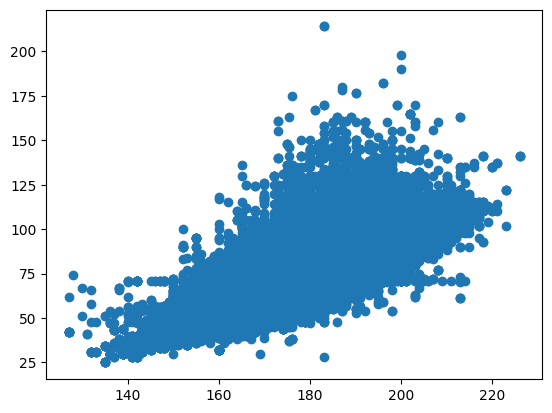

In [ ]:
plt.scatter(ath.Height,	ath.Weight)

In [ ]:
ath[['Height','Weight']].corr()

,Height,Weight
Height,1.000000,0.786626
Weight,0.786626,1.000000


2. Find out how many male and female had participated in the Qlympicd during 1876 to 2016

In [ ]:
ath.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Men's Basketball,0
1,2,A Lamusi,M,23,170.0,60.0,China,2012,Summer,London,Judo,Men's Extra-Lightweight,0
2,602,Abudoureheman,M,22,182.0,75.0,China,2000,Summer,Sydney,Boxing,Men's Middleweight,0


In [ ]:
ath[ath.Sex=='M'][(ath.Year>1875)&(ath.Year<2017)].head(3)

<ipython-input-144-ab613e2ec985>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ath[ath.Sex=='M'][(ath.Year>1875)&(ath.Year<2017)].head(3)


,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Men's Basketball,0
1,2,A Lamusi,M,23,170.0,60.0,China,2012,Summer,London,Judo,Men's Extra-Lightweight,0
2,602,Abudoureheman,M,22,182.0,75.0,China,2000,Summer,Sydney,Boxing,Men's Middleweight,0


In [ ]:
ath[ath.Sex=='F'][(ath.Year>1875)&(ath.Year<2017)].head(3)

<ipython-input-145-f1bae35747e1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ath[ath.Sex=='F'][(ath.Year>1875)&(ath.Year<2017)].head(3)


,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
4,1464,Ai Yanhan,F,14,168.0,54.0,China,2016,Summer,Rio de Janeiro,Swimming,Women's 200 metres Freestyle,0
5,1464,Ai Yanhan,F,14,168.0,54.0,China,2016,Summer,Rio de Janeiro,Swimming,Women's 4 x 200 metres Freestyle Relay,0
12,3611,An Zhongxin,F,23,170.0,65.0,China,1996,Summer,Atlanta,Softball,Women's Softball,2


<Axes: xlabel='Sex', ylabel='None'>

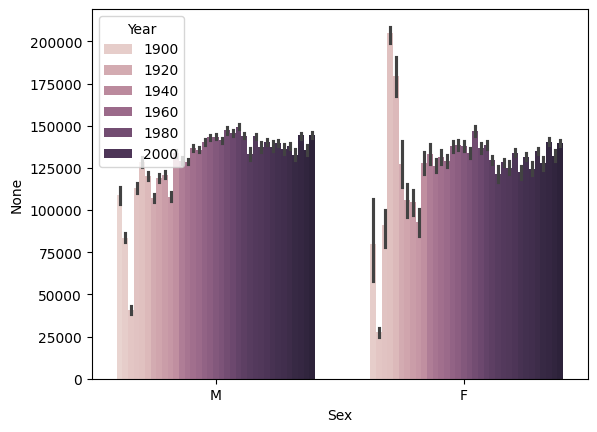

In [ ]:
sns.barplot(x=ath.Sex,y=ath.index,hue=ath.Year)

<Axes: >

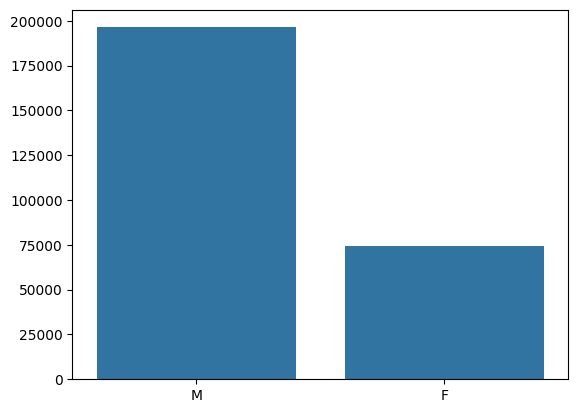

In [ ]:
a=len(ath.Sex[ath.Sex=="M"])
b=len(ath.Sex[ath.Sex=="F"])
sns.barplot(x=["M","F"],y=[a,b])

3. How many Male and Female have participated in the Summer and Winter Olympics

<Axes: xlabel='Sex'>

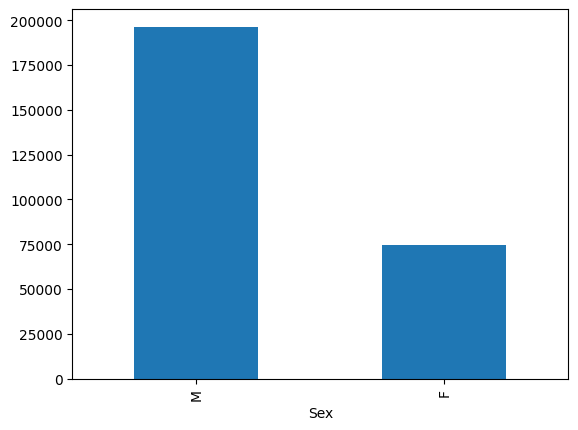

In [ ]:
#-- 2 bars
ath['Sex'].value_counts().plot.bar()

<Axes: xlabel='Season,Sex'>

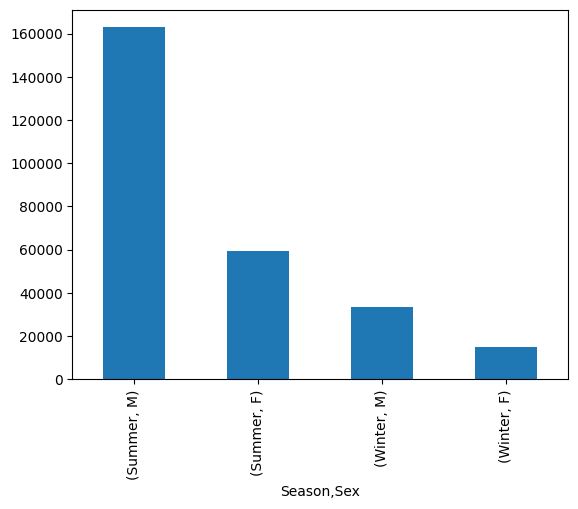

In [ ]:
#-- 4 bars
ath['Sex'].groupby(ath['Season']).value_counts().plot.bar()